In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
img  = np.ones((128,128,3),dtype = np.uint8)*255


In [ ]:
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


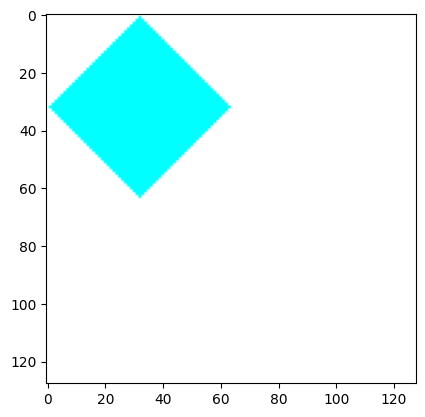

In [ ]:
ctr_cyan_x =32
ctr_cyan_y=32
for i in range(64):
  for j in range(64):
    if(np.abs(i-ctr_cyan_y)+np.abs(j-ctr_cyan_x)<32):
      img[i][j] = [0,255,255]
plt.imshow(img)
plt.show()

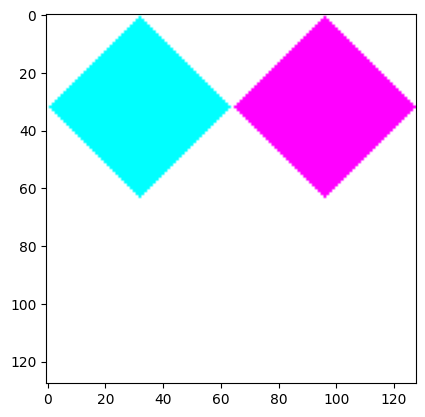

In [ ]:
ctr_magenta_x =96
ctr_magenta_y=32
for i in range(64):
  for j in range(64,128):
    if(np.abs(i-ctr_magenta_y)+np.abs(j-ctr_magenta_x)<32):
      img[i][j] = [255,0,255]
plt.imshow(img)
plt.show()

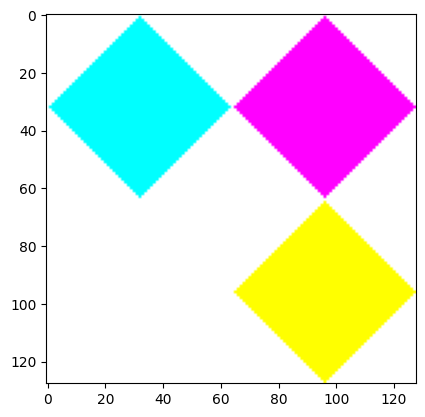

In [ ]:
ctr_yellow_x =96
ctr_yellow_y=96
for i in range(64,128):
  for j in range(64,128):
    if(np.abs(i-ctr_yellow_y)+np.abs(j-ctr_yellow_x)<32):
      img[i][j] = [255,255,0]
plt.imshow(img)
plt.show()

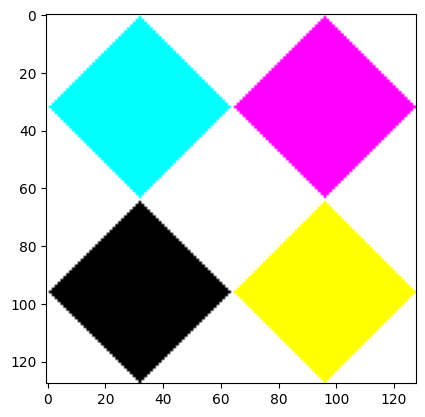

In [ ]:
ctr_black_x =32
ctr_black_y=96
for i in range(64,128):
  for j in range(64):
    if(np.abs(i-ctr_black_y)+np.abs(j-ctr_black_x)<32):
      img[i][j] = [0,0,0]
plt.imshow(img)
plt.show()

In [ ]:
img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite("output.png", img_bgr)

True

In [ ]:
def rgb_to_cmyk_channels(rgb_image):

    rgb_float = rgb_image.astype(np.float32) / 255.

    b = rgb_float[:, :, 2]
    g = rgb_float[:, :, 1]
    r = rgb_float[:, :, 0]

    k = 1 - np.maximum(np.maximum(r, g), b)

    c = np.zeros_like(k)
    m = np.zeros_like(k)
    y = np.zeros_like(k)

    non_black = k < 1
    c[non_black] = (1 - r[non_black] - k[non_black]) / (1 - k[non_black])
    m[non_black] = (1 - g[non_black] - k[non_black]) / (1 - k[non_black])
    y[non_black] = (1 - b[non_black] - k[non_black]) / (1 - k[non_black])

    c_channel = (c * 255).astype(np.uint8)
    m_channel = (m * 255).astype(np.uint8)
    y_channel = (y * 255).astype(np.uint8)
    k_channel = (k * 255).astype(np.uint8)

    return c_channel, m_channel, y_channel, k_channel

In [ ]:
c_channel, m_channel, y_channel, k_channel = rgb_to_cmyk_channels(img)
cv2.imwrite("cyan.png",c_channel)
cv2.imwrite("magenta.png",m_channel)
cv2.imwrite("yellow.png",y_channel)
cv2.imwrite("black.png",k_channel)

True

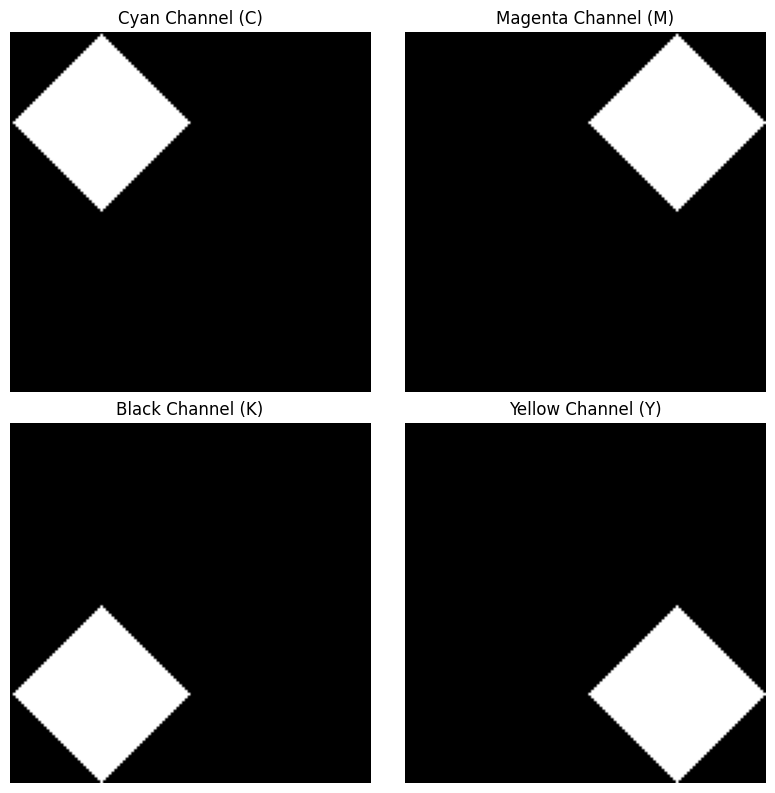

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(c_channel, cmap='gray')
plt.title('Cyan Channel (C)')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(m_channel, cmap='gray')
plt.title('Magenta Channel (M)')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(y_channel, cmap='gray')
plt.title('Yellow Channel (Y)')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(k_channel, cmap='gray')
plt.title('Black Channel (K)')
plt.axis('off')

plt.tight_layout()
plt.show()